In [1]:
from toolz import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
%matplotlib widget


import pathlib

from collections import Counter

import networkx as nx
import nltk

In [2]:
nltk.download('popular')
nltk.download('averaged_perceptron_tagger_ru')
nltk.download('tagsets')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to

True

In [22]:
lmap = compose(list, map)
ltake = compose(list, take)

In [4]:
def map_df_ingredients_element(func, df):
    df = df.copy()
    df['ingredients'] = df['ingredients'].map(lambda v: lmap(func, v))
    return df

In [5]:
data_path = pathlib.Path('data')

In [6]:
df = pd.read_json(data_path.joinpath('ready_dataframe.json'))
df = map_df_ingredients_element(compose(str.lower, str.strip), df)
df

,id,title,course,cuisine,ingredients
0,28195,Банановое мороженое с корицей,Выпечка и десерты,Карибская кухня,"[бананы, лимонный сок, молотая корица, ванильн..."
1,28141,Ананасово-кокосовый шербет,Выпечка и десерты,Карибская кухня,"[сахар, кокосовое молоко, корень имбиря, анана..."
2,27929,"Десерт из манго, клубники и текилы",Выпечка и десерты,Карибская кухня,"[клубника, манго, сахар, тертая цедра лайма, т..."
3,28192,Ананас с соусом из манго и рома,Выпечка и десерты,Карибская кухня,"[манго, темный ром, сок лайма, сахар, тертая ц..."
4,28463,Клубничный соус с текилой,Выпечка и десерты,Карибская кухня,"[клубника, сахарная пудра, сок лайма, текила, ..."
...,...,...,...,...,...
41433,43380,Постный борщ с фасолью,Супы,Украинская кухня,"[белая фасоль, овощной бульон, свекла, картофе..."
41434,80446,Суп энгамат,Супы,Шведская кухня,"[цветная капуста, морковь, картофель, лук-поре..."
41435,136820,Гороховый суп с блинчиками,Супы,Шведская кухня,"[горох, репчатый лук, гвоздика, свиная рулька,..."
41436,18014,Суп из брокколи и кростини с сыром бри,Супы,Шведская кухня,"[оливковое масло, репчатый лук, овощной бульон..."


In [7]:
ingredients_counter = Counter()
for lst in df['ingredients']:
    ingredients_counter.update(lst)
first_ingresients, _ = zip(*ingredients_counter.most_common(200))
first_ingresients = list(first_ingresients)
# first_ingresients

In [8]:
it = lmap(compose(tuple, nltk.word_tokenize), first_ingresients)
# it

In [12]:
G = nx.Graph()
G.add_nodes_from(it)
for u in G.nodes:
    for v in G.nodes:
        if set(u) & set(v) and u != v:
            G.add_edge(u, v)

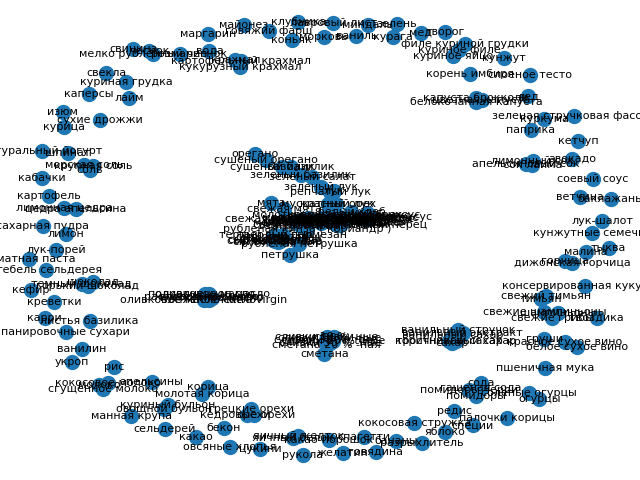

In [13]:
plt.close(0)
plt.figure(0)
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=100)
nx.draw_networkx_labels(G, pos, 
                        font_size=8,
                        labels={x: ' '.join(x) for x in G.nodes})
# plt.axis('tight')
None

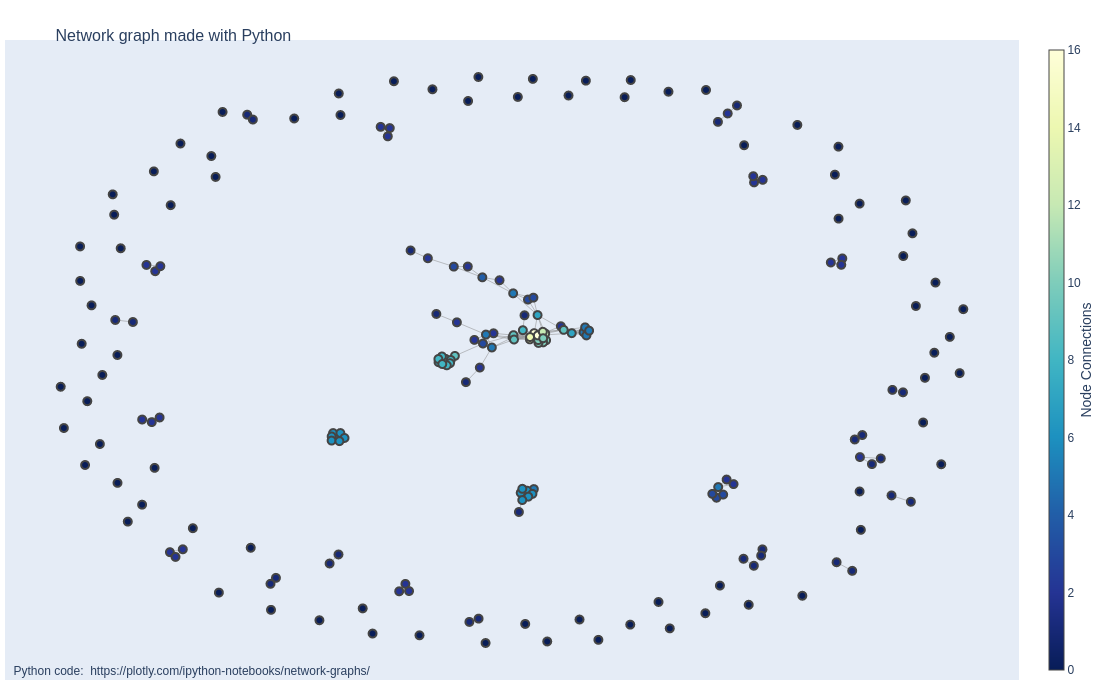

In [25]:
pos = nx.spring_layout(G)

edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
node_text = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(' '.join(node))

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=8,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))


node_adjacencies = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    # node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text


fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                width=1000, height=700,
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()


In [ ]:
nltk.pos_tag(it[1], lang='rus')

In [ ]:
nltk.help.upenn_tagset()

In [ ]:
it = df.groupby('cuisine').count()
it.sort_values('title', ascending=False).head(30)